In [1]:
# bibliotecas a serem utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import poisson,skellam
from tqdm.notebook import tqdm_notebook
plt.style.use('ggplot')

# endereço do arquivo base
caminho = r'C:\Users\david\OneDrive\DIVERSOS\ESTATÍSTICA BÁSICA\ESTATÍSTICA E FUTEBOL\PLANILHAS\brasileirao-pequena-simulacao.xlsx'

# abrir a pasta de trabalho do Excel
xls = pd.ExcelFile(caminho)

# guardar a planilha da aba 2020 no dataframe df_20
df_20 = pd.read_excel(xls, sheet_name='2020')

# guardar a planilha da aba 2020 no dataframe df_21
df_21 = pd.read_excel(xls, sheet_name='2021-com-criterios')

## 1. Média de gols feitos e sofridos pelas equipes no campeonato do ano anterior.

In [2]:
# GFM = MÉDIA DE GOLS FEITOS PELO(S) MANDANTE(S)
# GSM = MÉDIA DE GOLS SOFRIDOS PELO(S) MANDANTE(S)
# GFV = MÉDIA DE GOLS FEITO(S) PELO(S) VISITANTE(S) = GSM
# GSV = MÉDIA DE GOLS SOFRIDO(S) PELO(S) VISITANTE(S) = GFM


# GFM DE TODOS OS MANDANTES DE 2020
GFM_20 = round(df_20['Gol Mandante'].mean(), 2)

# GSM DE TODOS OS MANDANTES DE 2020
GSM_20 = round(df_20['Gol Visitante'].mean(), 2)

# GFV DE TODOS OS VISTITANTES DE 2020
GFV_20 = GSM_20

# GSV DE TODOS OS VISITANTES DE 2020
GSV_20 = GFM_20

[GFM_20, GFV_20]

[1.41, 1.07]

## 2 .SIMULAÇÃO DE VÁRIOS CAMPEONATOS

In [3]:
equipes = sorted(list(df_21['Mandante'].unique()), reverse=False)

# Rodadas Realizadas
colunas = ['Rodada', 'Mandante', 'Gol Mandante', 'Gol Visitante', 
           'Visitante', 'Pontos Mandante', 'Pontos Visitante',
          'Vitória Mandante', 'Vitória Visitante']
colunas1 = ['Mandante', 'Gol Mandante', 'Gol Visitante', 
           'Visitante', 'Pontos Mandante', 'Pontos Visitante',
          'Vitória Mandante', 'Vitória Visitante']
# colunas1 = ['Rodada', 'Mandante', 'Gol Mandante', 'Gol Visitante', 'Visitante', 'Pts Mandante', 'Pts Visitante']
colunas2 = ['equipe', 'pontuação', 'vitórias', 'gols pró', 'saldo de gols']

PartidasRealizadas = df_21[df_21['Gol Mandante'] != ' '].reset_index(drop=True)

In [4]:
# equipes

In [5]:
del PartidasRealizadas['Rodada']

In [6]:
PartidasRealizadas

,Mandante,Gol Mandante,Gol Visitante,Visitante,Pontos Mandante,Pontos Visitante,Vitória Mandante,Vitória Visitante
0,FLAMENGO,1,0,PALMEIRAS,3,0,1,0
1,CORINTHIANS,0,1,ATLETICO,0,3,0,1
2,SAO PAULO,0,0,FLUMINENSE,1,1,0,0
3,ATLETICO MINEIRO,1,2,FORTALEZA,0,3,0,1
4,INTERNACIONAL,2,2,SPORT,1,1,0,0
...,...,...,...,...,...,...,...,...
323,SPORT,1,0,BAHIA,3,0,1,0
324,ATHLETICO PARANAENSE,0,1,ATLETICO MINEIRO,0,3,0,1
325,JUVENTUDE,1,0,FLUMINENSE,3,0,1,0
326,CUIABA,1,0,INTERNACIONAL,3,0,1,0


In [7]:
df_futuras = df_21[df_21['Gol Mandante'] == ' '].reset_index(drop=True)

In [8]:
del df_futuras['Rodada']
del df_futuras['Gol Mandante']
del df_futuras['Gol Visitante']
del df_futuras['Pontos Mandante'] 
del df_futuras['Pontos Visitante'] 
del df_futuras['Vitória Mandante'] 
del df_futuras['Vitória Visitante']

In [9]:
df_futuras

,Mandante,Visitante
0,GREMIO,FLAMENGO
1,ATLETICO,JUVENTUDE
2,BAHIA,ATLETICO MINEIRO
3,FLUMINENSE,AMERICA
4,CORINTHIANS,SANTOS
5,SAO PAULO,ATHLETICO PARANAENSE
6,ATLETICO MINEIRO,JUVENTUDE
7,INTERNACIONAL,FLAMENGO
8,FORTALEZA,PALMEIRAS
9,BAHIA,CUIABA


In [10]:
colunas3 = ['Mandante', 'Visitante']
# PartidasFaltantes = {'Mandante':[], 'Visitante':[]}

# for k in tqdm_notebook(np.arange(0, df_futuras.shape[0], 1)):
#     for j in np.arange(len(colunas3)):
#         PartidasFaltantes[colunas3[j]].append(df_futuras.iloc[k][j])

In [24]:
# número de gols marcados por time
k = np.arange(0, 6, 1)

simulacao = pd.DataFrame()


for final in tqdm_notebook(np.arange(1000)):
    #partidas já realizadas
    df_realizadas = PartidasRealizadas
    
    #dicionário com as info de todas as equipes do campeonato
    InfoEquipes = {}

    for equipe in equipes:
        InfoEquipes[equipe] = dict({'PJm':df_realizadas.loc[df_realizadas['Mandante']==equipe].shape[0],
                             'PJv':df_realizadas.loc[df_realizadas['Visitante']==equipe].shape[0],
                             'GPm':df_realizadas.loc[df_realizadas['Mandante']==equipe, 'Gol Mandante'].sum()+GFM_20, 
                             'GCm':df_realizadas.loc[df_realizadas['Mandante']==equipe, 'Gol Visitante'].sum()+GSM_20,
                            'GPv':df_realizadas.loc[df_realizadas['Visitante']==equipe, 'Gol Visitante'].sum()+GFV_20, 
                             'GCv':df_realizadas.loc[df_realizadas['Visitante']==equipe, 'Gol Mandante'].sum()+GSV_20})
    
    #partidas a serem simuladas
    PartidasFaltantes = {'Mandante':[], 'Visitante':[]}

    for q in np.arange(0, df_futuras.shape[0], 1):
        for j in np.arange(len(colunas3)):
            PartidasFaltantes[colunas3[j]].append(df_futuras.iloc[q][j])
            
    for num in np.arange(df_futuras.shape[0]):
        
        #equipe mandante na partida
        mandante = PartidasFaltantes['Mandante'][num]
        #equipe visitante na partida
        visitante = PartidasFaltantes['Visitante'][num]

        # componentes vetor mandante (GFM, GSM)
        GFM = InfoEquipes[PartidasFaltantes['Mandante'][num]]['GPm']/(InfoEquipes[PartidasFaltantes['Mandante'][num]]['PJm']+1)
        GSM = InfoEquipes[PartidasFaltantes['Mandante'][num]]['GCm']/(InfoEquipes[PartidasFaltantes['Mandante'][num]]['PJm']+1)

        # componentes vetor visitante (GFV, GSV)
        GFV = InfoEquipes[PartidasFaltantes['Visitante'][num]]['GPv']/(InfoEquipes[PartidasFaltantes['Visitante'][num]]['PJv']+1)
        GSV = InfoEquipes[PartidasFaltantes['Visitante'][num]]['GCv']/(InfoEquipes[PartidasFaltantes['Visitante'][num]]['PJv']+1)

        # vetor do jogo
#         VetorJogo = dict({'m':np.mean([GFM, GSV]), 'v':np.mean([GFV, GSM])})
        VetorJogo = [np.mean([GFM, GSV]), np.mean([GFV, GSM])]

        cdfm = np.cumsum(poisson.pmf(k, VetorJogo[0])) #distribuição Poisson acumulada gols mandante
        cdfv = np.cumsum(poisson.pmf(k, VetorJogo[1])) #distribuição Poisson acumulada gols visitante

        x = np.random.rand() #número aletatório para o mandante
        y = np.random.rand() #número aletatório para o visitante
        #determinar número de gols do mandante
        if (x >=0 and x <= cdfm[0]):
            golmandante = 0
        elif (x > cdfm[0] and x <= cdfm[1]):
            golmandante = 1
        elif (x > cdfm[1] and x <= cdfm[2]):
            golmandante = 2
        elif (x > cdfm[2] and x <= cdfm[3]):
            golmandante = 3
        elif (x > cdfm[3] and x <= cdfm[4]):
            golmandante = 4
        elif (x > cdfm[4] and x <= cdfm[5]):
            golmandante = 5
        #determinar número de gols do visitante
        if (y >=0 and y <= cdfv[0]):
            golvisitante = 0
        elif (y > cdfv[0] and y <= cdfv[1]):
            golvisitante = 1
        elif (y > cdfv[1] and y <= cdfv[2]):
            golvisitante = 2
        elif (y > cdfv[2] and y <= cdfv[3]):
            golvisitante = 3
        elif (y > cdfv[3] and y <= cdfv[4]):
            golvisitante = 4
        elif (y > cdfv[4] and y <= cdfv[5]):
            golvisitante = 5

        #definir pontuação e vitória de mandante e visitante
        if golmandante > golvisitante:
            PontosMandante = 3
            PontosVisitante = 0
            VitoriaMandante = 1
            VitoriaVisitante = 0
        elif golmandante == golvisitante:
            PontosMandante = 1
            PontosVisitante = 1
            VitoriaMandante = 0
            VitoriaVisitante = 0
        else:
            PontosMandante = 0
            PontosVisitante = 3
            VitoriaMandante = 0
            VitoriaVisitante = 1  

        #criar dicionário da partida
        partida = {'Mandante':mandante, 
                'Gol Mandante':golmandante, 
                'Gol Visitante':golvisitante, 
                'Visitante':visitante, 
                'Pontos Mandante':PontosMandante, 
                'Pontos Visitante':PontosVisitante, 
                'Vitória Mandante':VitoriaMandante, 
                'Vitória Visitante':VitoriaVisitante}
        #atualizar partidas realizadas
        df_realizadas = df_realizadas.append(partida, ignore_index=True)

    #gerar classificação do campeonato
    classificacao = {'equipe':[],
                     'pontuação':[],
                     'vitórias':[],
                     'gols pró':[],
                     'saldo de gols':[]}
    for equipe in equipes:
        classificacao['equipe'].append(equipe)
        classificacao['pontuação'].append(sum([df_realizadas.loc[df_realizadas['Mandante']==equipe, 'Pontos Mandante'].sum(), 
                                               df_realizadas.loc[df_realizadas['Visitante']==equipe, 'Pontos Visitante'].sum()]))
        classificacao['vitórias'].append(sum([df_realizadas.loc[df_realizadas['Mandante']==equipe, 'Vitória Mandante'].sum(), 
                                              df_realizadas.loc[df_realizadas['Visitante']==equipe, 'Vitória Visitante'].sum()]))
        classificacao['gols pró'].append(sum([df_realizadas.loc[df_realizadas['Mandante']==equipe, 'Gol Mandante'].sum(), 
                                              df_realizadas.loc[df_realizadas['Visitante']==equipe, 'Gol Visitante'].sum()]))
        classificacao['saldo de gols'].append(sum([df_realizadas.loc[df_realizadas['Mandante']==equipe, 
                                                           'Gol Mandante'].sum(), 
                                                   df_realizadas.loc[df_realizadas['Visitante']==equipe, 
                                                           'Gol Visitante'].sum()])-sum([df_realizadas.loc[df_realizadas['Visitante']==equipe, 
                                                                                                 'Gol Mandante'].sum(), 
                                                                                         df_realizadas.loc[df_realizadas['Mandante']==equipe, 
                                                                                                 'Gol Visitante'].sum()]))

    tabela = pd.DataFrame(classificacao, columns=colunas2).sort_values(['pontuação', 
                                                                        'vitórias',
                                                                        'saldo de gols', 
                                                                        'gols pró'], 
                                                                       ascending=False).reset_index(drop=True)

    tabela = tabela.sort_values(['pontuação', 'vitórias','saldo de gols', 'gols pró'],ascending=False).reset_index(drop=True)
    tabela.insert(0, 'posição', list(np.arange(1, 21, 1)))
    simulacao = simulacao.append(tabela)

  0%|          | 0/1000 [00:00<?, ?it/s]

## Resultados

In [25]:
simulacao

,posição,equipe,pontuação,vitórias,gols pró,saldo de gols
0,1,ATLETICO MINEIRO,84,26,60,32
1,2,FLAMENGO,70,20,66,33
2,3,PALMEIRAS,68,21,60,17
3,4,RED BULL BRAGANTINO,59,15,54,11
4,5,FORTALEZA,56,16,46,0
...,...,...,...,...,...,...
15,16,SANTOS,44,10,33,-11
16,17,ATHLETICO PARANAENSE,41,12,39,-10
17,18,SPORT,40,10,24,-11
18,19,GREMIO,38,10,37,-14


## ANÁLISES SPORT CLUB DO RECIFE

In [26]:
%%time
simulacao_individual = simulacao[simulacao['equipe'] == 'SPORT']
simulacao_individual

Wall time: 2.96 ms


,posição,equipe,pontuação,vitórias,gols pró,saldo de gols
17,18,SPORT,37,9,22,-15
18,19,SPORT,36,8,24,-13
17,18,SPORT,39,10,26,-11
17,18,SPORT,36,8,23,-13
18,19,SPORT,39,9,25,-11
...,...,...,...,...,...,...
18,19,SPORT,39,9,25,-9
18,19,SPORT,41,10,24,-10
18,19,SPORT,36,9,25,-17
17,18,SPORT,37,9,24,-13


### CHANCES DE PONTUAÇÃO SPORT CLUB DO RECIFE

In [27]:
pontuacao_individual, chances_pts_fn = np.unique(simulacao_individual['pontuação'], return_counts=True)
chances_pts_fr = [round(j/sum(chances_pts_fn), 4) for j in chances_pts_fn]
df_pontuacao = pd.DataFrame({'PONTUAÇÃO':pontuacao_individual, 'CHANCE':chances_pts_fr})
df_pontuacao.sort_values('CHANCE', ascending=False).reset_index(drop=True)

,PONTUAÇÃO,CHANCE
0,37,0.197
1,38,0.145
2,40,0.141
3,36,0.125
4,39,0.107
5,34,0.072
6,35,0.071
7,42,0.051
8,41,0.050
9,43,0.024


Text(0.5, 0, 'Pontos')

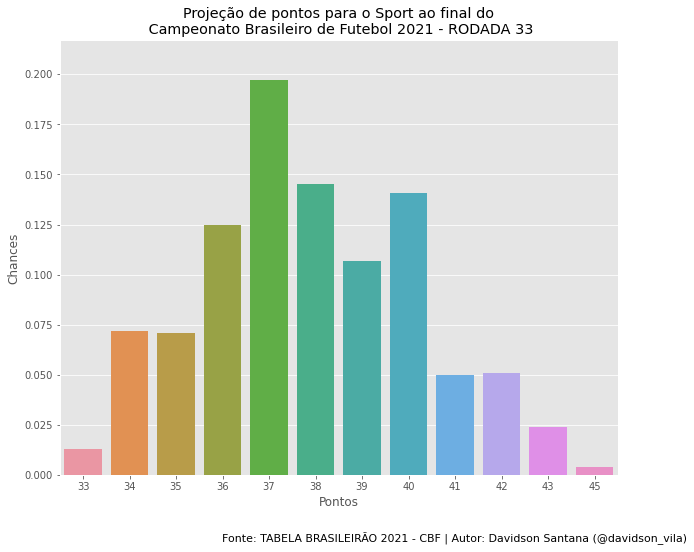

In [28]:
plt.figure(figsize=(10,8))
h = sns.barplot(x=df_pontuacao['PONTUAÇÃO'], y=df_pontuacao['CHANCE'])
plt.ylabel('Chances')
plt.ylim(0, df_pontuacao['CHANCE'].max() + 0.02)
plt.title('Projeção de pontos para o Sport ao final do\n Campeonato Brasileiro de Futebol 2021 - RODADA 33')
plt.figtext(0.35, 0.009,'Fonte: TABELA BRASILEIRÃO 2021 - CBF | Autor: Davidson Santana (@davidson_vila)', fontsize=11)
plt.xlabel('Pontos')
# plt.savefig('./IMAGENS/rodada-33-projecao-pontos-sport-2021.png', format='png')

### CHANCES DE POSIÇÕES DO SPORT CLUB DO RECIFE

In [29]:
%%time
# posicao_individual = simulacao_individual['posição'].value_counts(ascending=False)
# chances = round(posicao_individual/len(simulacao_individual['posição']), 3)

posicao_individual, chances_fn = np.unique(simulacao_individual['posição'], return_counts=True)

Wall time: 1 ms


In [30]:
chances_fr = [round(i/sum(chances_fn), 4) for i in chances_fn]
chances_time = pd.DataFrame({'POSIÇÃO':posicao_individual, 'CHANCE':chances_fr})

In [31]:
%%time
chances_time.set_index('POSIÇÃO', drop=True)

Wall time: 1.15 ms


,CHANCE
POSIÇÃO,
15,0.003
16,0.007
17,0.054
18,0.309
19,0.627


In [32]:
round(chances_time.loc[chances_time['POSIÇÃO']>16]['CHANCE'].sum(), 4)

0.99

## ANÁLISES PARA O 16º COLOCADO

In [21]:
simulacao_pontos = simulacao[simulacao['posição'] == 16]
pontuacao_individual = simulacao_pontos['pontuação'].value_counts()
chances_pontos = round(pontuacao_individual/len(simulacao_pontos),4)
chances_pontos

45    0.2812
44    0.2510
46    0.1840
43    0.1716
42    0.0480
47    0.0436
41    0.0102
48    0.0076
40    0.0024
49    0.0002
39    0.0002
Name: pontuação, dtype: float64

Text(0.5, 0, 'Pontos')

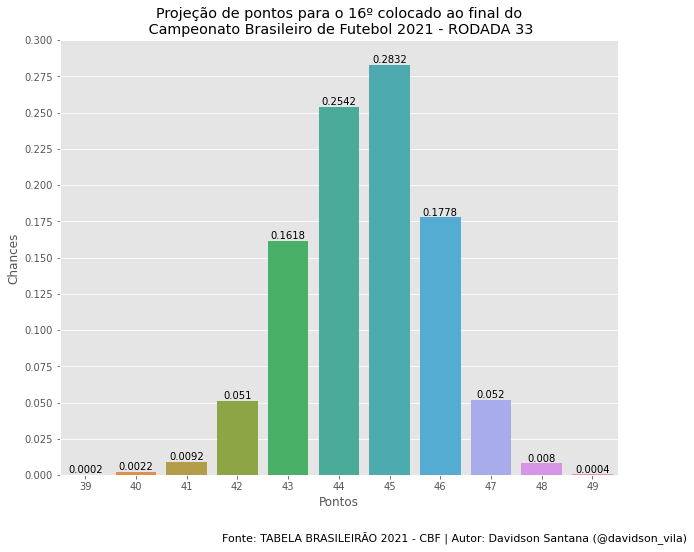

In [25]:
plt.figure(figsize=(10,8))
g1 = sns.barplot(x=chances_pontos.index, y=chances_pontos)
plt.ylabel('Chances')
plt.yticks(np.arange(0, chances_pontos.max()+0.03, 0.025))
# g1.annotate('25,5%', xy=(45, 0.2551), fontsize=14, xytext=(45, 0.2551))
plt.bar_label(g1.containers[0])
plt.title('Projeção de pontos para o 16º colocado ao final do\n Campeonato Brasileiro de Futebol 2021 - RODADA 33')
plt.figtext(0.35, 0.009,'Fonte: TABELA BRASILEIRÃO 2021 - CBF | Autor: Davidson Santana (@davidson_vila)', fontsize=11)
plt.xlabel('Pontos')
# plt.savefig('./IMAGENS/rodada-33-projecao-pontos-16-colocado-2021.png', format='png')